# Data Analysis
Just to take a quick look at the distribution around the actual distance.

In [78]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Visualizing 3D and signal strength along 3 axes.
## Import data

In [118]:
# Locations
# 0 - Laser Cutter
# 1 - 3D Printers
# 2 - Back Left Table
# 3 - Back Right Table
# 4 - Front Table
# 5 - Tool Boxes
# 6 - Front Desk

col_names=["r_dist", "r_rssi", "g_dist", "g_rssi", "b_dist", "b_rssi"]
laser_cutter_df = pd.read_csv("laser_cutter.csv", names=col_names)
laser_cutter_df["location"] = "0"

printers_df = pd.read_csv("printers.csv", names=col_names)
printers_df["location"] = "1"

bl_table_df = pd.read_csv("bl_table.csv", names=col_names)
bl_table_df["location"] = "2"

br_table_df = pd.read_csv("br_table.csv", names=col_names)
br_table_df["location"] = "3"

toolboxes_df = pd.read_csv("toolboxes.csv", names=col_names)
toolboxes_df["location"] = "4"

front_table_df = pd.read_csv("front_table.csv", names=col_names)
front_table_df["location"] = "5"

front_desk_df = pd.read_csv("front_desk.csv", names=col_names)
front_desk_df["location"] = "6"

df = pd.concat([laser_cutter_df, printers_df, bl_table_df, br_table_df, toolboxes_df, front_table_df, front_desk_df])

In [119]:
# 0
color_discrete_map = {"0": 'rgb(128, 0, 128)', "1": 'rgb(0, 0, 255)', "2": 'rgb(255, 0, 0)',
                       "3": 'rgb(0, 128, 128)', "4": 'rgb(200, 128, 0)', "5": 'rgb(200, 200, 200)', "6":'rgb(0, 255, 0)'}

In [120]:
fig = px.scatter_3d(df, x='r_dist', y='g_dist', z='b_dist',
              color='location', color_discrete_map=color_discrete_map)
fig.show()

In [121]:
fig = px.scatter_3d(df, x='r_rssi', y='g_rssi', z='b_rssi',
              color='location', color_discrete_map=color_discrete_map)
fig.show()

In [128]:
X = df.drop('location', axis=1)
y = df['location']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [130]:
model.feature_importances_

array([0.36156378, 0.        , 0.30211816, 0.        , 0.33631806,
       0.        ])

Notes here about feature importance

[Text(0.4230769230769231, 0.875, 'x[0] <= 1403.612\ngini = 0.851\nsamples = 156\nvalue = [23.0, 23.0, 26.0, 28.0, 13.0, 25.0, 18.0]'),
 Text(0.15384615384615385, 0.625, 'x[2] <= 1085.748\ngini = 0.549\nsamples = 37\nvalue = [0, 0, 2, 0, 0, 18, 17]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(0.23076923076923078, 0.375, 'x[4] <= 1537.167\ngini = 0.523\nsamples = 28\nvalue = [0, 0, 2, 0, 0, 9, 17]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.453\nsamples = 26\nvalue = [0, 0, 0, 0, 0, 9, 17]'),
 Text(0.6923076923076923, 0.625, 'x[4] <= 594.34\ngini = 0.814\nsamples = 119\nvalue = [23, 23, 24, 28, 13, 7, 1]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 2581.62\ngini = 0.124\nsamples = 15\nvalue = [14, 0, 1, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.125, 

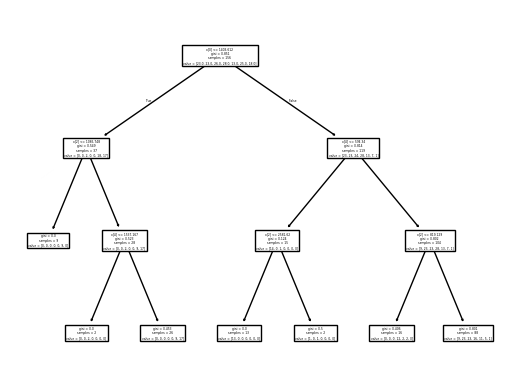

In [131]:
plot_tree(model)

In [132]:
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.45
Confusion Matrix:
[[1 4 0 0 0 0 0]
 [0 9 0 0 0 0 0]
 [0 6 0 0 0 0 0]
 [0 3 0 1 0 0 0]
 [0 2 0 1 0 0 0]
 [0 2 1 1 0 2 1]
 [0 0 0 0 0 1 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.35      1.00      0.51         9
           2       0.00      0.00      0.00         6
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00         3
           5       0.67      0.29      0.40         7
           6       0.83      0.83      0.83         6

    accuracy                           0.45        40
   macro avg       0.45      0.37      0.34        40
weighted avg       0.48      0.45      0.38        40



/opt/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [133]:
result_df = X_test.copy()
result_df['pred'] = y_pred

fig = px.scatter_3d(result_df, x='r_dist', y='g_dist', z='b_dist',
            color='pred', color_discrete_map=color_discrete_map)
fig.show()

It looks like the decision tree is not exceptional at classifying the points.  
It tends to overclassify some clusters over others, completely ignoring some.  
I can still give it a try, but I might go for a more straightforward method, characterizing each of the clusters by its meaning and std along each axis (removing outliers), and grading the likelihood by how many stds away it is.

We do know from the feature importances that rssi is largely not the way to separate locations. So I will ignore them.

In [135]:
def remove_outliers(arr):
    mean = arr.mean()
    std = arr.std()
    filtered_arr = arr[(arr >= (mean - 3 * std)) & (arr <= (mean + 3 * std))]
    return filtered_arr.mean(), filtered_arr.std()

In [148]:
loc_dfs = [laser_cutter_df, printers_df, bl_table_df, br_table_df, toolboxes_df, front_table_df, front_desk_df]

centers_rows = []
for index, loc_df in enumerate(loc_dfs):
    print(index)
    r_dist, r_std = remove_outliers(loc_df['r_dist'])
    print(f'.r_dist = {round(r_dist * 100)},')
    print(f'.r_std = {round(r_std * 100)},')

    g_dist, g_std = remove_outliers(loc_df['g_dist'])
    print(f'.g_dist = {round(g_dist * 100)},')
    print(f'.g_std = {round(g_std * 100)},')

    b_dist, b_std = remove_outliers(loc_df['b_dist'])
    print(f'.g_dist = {round(b_dist * 100)},')
    print(f'.g_std = {round(b_std * 100)}')

    row = {'r_dist': r_dist, 'r_err': r_std, 'g_dist': g_dist, 'g_err': g_std, 'b_dist': b_dist, 'b_err': b_std, 'loc': str(index)}
    centers_rows.append(row)

centers_df = pd.DataFrame(centers_rows)

0
.r_dist = 248808,
.r_std = 46852,
.g_dist = 186345,
.g_std = 40863,
.g_dist = 68030,
.g_std = 48165
1
.r_dist = 251131,
.r_std = 40039,
.g_dist = 158327,
.g_std = 51113,
.g_dist = 121837,
.g_std = 35761
2
.r_dist = 201109,
.r_std = 46307,
.g_dist = 143392,
.g_std = 37990,
.g_dist = 115855,
.g_std = 30466
3
.r_dist = 202342,
.r_std = 32975,
.g_dist = 112327,
.g_std = 48537,
.g_dist = 136698,
.g_std = 37661
4
.r_dist = 221593,
.r_std = 42533,
.g_dist = 137438,
.g_std = 61790,
.g_dist = 150024,
.g_std = 33292
5
.r_dist = 121314,
.r_std = 47481,
.g_dist = 105024,
.g_std = 43417,
.g_dist = 186952,
.g_std = 33277
6
.r_dist = 94278,
.r_std = 31528,
.g_dist = 133598,
.g_std = 24665,
.g_dist = 209722,
.g_std = 31180


In [144]:
fig = px.scatter_3d(centers_df, x='r_dist', error_x='r_err', y='g_dist', error_y='g_err', z='b_dist', error_z='b_err',
            color='loc', color_discrete_map=color_discrete_map)
fig.show()